This notebook was created to experiment and learn about cleaning and feature reduction of data

In [1]:
# Import dependancies
import os
import glob
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Prepare functions for loading the data sets
DATA_PATH = "datasets"
def load_data(data_path = DATA_PATH, file_name = ""):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path)

# Function for normalizing a column
def normalize_col(data):
    data -= np.min(data)
    # "peak-to-peak" (max subtract the min values )
    data /= np.ptp(data)
    return data

# Function for normalizing a data set
def normalize(data, features = []):
    data = data.copy()
    if len(features) == 0:
        features = data.columns
    
    for feature in features:
        data[feature] = normalize_col(data[feature])
        
    return data

# Function for saving a CSV file (with a "," as the delimitor)
def csv_save(df, file_name):

        df.to_csv(file_name + ".csv", sep=',')

In [3]:
# Load the data
deng_features = load_data(file_name = "DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv")
deng_lables = load_data(file_name = "DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv")
deng_data = deng_features.join(deng_lables['total_cases']) # This df contains the features and the total_cases column
data = deng_data.copy()
competition_test_features = load_data(file_name = "DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv")

In [4]:
# Adding a new colum named "week_num". This gives each week a number based on its year 
# and week number that year. Conological numbering

deng_features["week_Num"] = deng_features["weekofyear"] + (52*(deng_features["year"] - 1990))
deng_lables["week_Num"] = deng_lables["weekofyear"] + (52*(deng_lables["year"] - 1990))
deng_data_weekNum = deng_data.copy()
deng_data_weekNum = deng_data_weekNum["weekofyear"] + (52*(deng_lables["year"] - 1990))

In [5]:
deng_features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_Num
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,600.146291
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,280.556450
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,18.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,381.750000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,646.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,828.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,1093.000000


In [6]:
deng_data.values

array([['sj', 1990, 18, ..., 20.0, 16.0, 4],
       ['sj', 1990, 19, ..., 22.2, 8.6, 5],
       ['sj', 1990, 20, ..., 22.8, 41.4, 4],
       ...,
       ['iq', 2010, 23, ..., 19.2, 7.4, 1],
       ['iq', 2010, 24, ..., 21.0, 16.0, 1],
       ['iq', 2010, 25, ..., 22.2, 20.4, 4]], dtype=object)

In [7]:
featuresToCompare = ['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

#compareFeatures_NonParametric(data_highOutbreaks,data_lowOutbreaks, featuresToCompare)

# Finding Relavent Features

Here we will explore the features a bit to get an idea of how they relate to the total numer of outbreaks. The goal is to remove features that are dependant or do not relate to the total number of outbreaks.

## Feature Selection
We will select features which have high varience and remove features wich strongly correlate with other variables.
Methods found from: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/


## Removing null values:

There aren't any features which have a high amount of missing values (All are under 20%) so we will later impute the missing values. However, the data we are working with has seaseons since we are dealing with data that has been collected over multiple years. 

Brad noted that we should make sure there are no extra year columns so we have a consistent number of data points for each cycle (year) as to not give errors when working with seasonal models. We will remove all rows with when week of year is 53 or above inclusive.

In [8]:
# Lets take a better look at our data so we can see more of the weekofyear feature
with pd.option_context("display.max_rows",500,"display.max_columns", 20):
    print(deng_data)

     city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1      sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3      sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
5      sj  1990          23      1990-06-04       NaN  0.174850  0.254314   
6      sj  1990          24      1990-06-11  0.112900  0.092800  0.205071   
7      sj  1990          25      1990-06-18  0.072500  0.072500  0.151471   
8      sj  1990          26      1990-06-25  0.102450  0.146175  0.125571   
9      sj  1990          27      1990-07-02       NaN  0.121550  0.160683   
10     sj  1990          28      1990-07-09  0.192875  0.082350  0.191943   
11     sj  1990          29      1990-07-16  0.291600  0.211800  0.301200   

In [9]:
# Remove weekofyear 53 and above.
deng_data = deng_data[deng_data.weekofyear <= 52]
deng_data.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1451.000000,1451.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1451.000000
mean,2001.026878,26.412130,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.685734
std,5.406124,14.964361,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.653121
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.000000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.000000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.000000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,52.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [10]:
# Looking at the percent of null values in each feature
deng_data.isnull().sum()/len(deng_data)*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  13.025500
ndvi_nw                                   3.239145
ndvi_se                                   1.171606
ndvi_sw                                   1.171606
precipitation_amt_mm                      0.551344
reanalysis_air_temp_k                     0.344590
reanalysis_avg_temp_k                     0.344590
reanalysis_dew_point_temp_k               0.344590
reanalysis_max_air_temp_k                 0.344590
reanalysis_min_air_temp_k                 0.344590
reanalysis_precip_amt_kg_per_m2           0.344590
reanalysis_relative_humidity_percent      0.344590
reanalysis_sat_precip_amt_mm              0.551344
reanalysis_specific_humidity_g_per_kg     0.344590
reanalysis_tdtr_k                         0.344590
station_avg_temp_c             

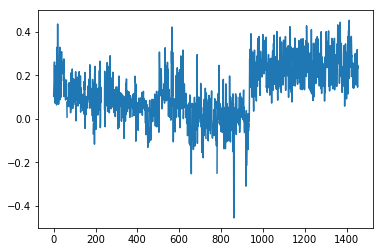

In [11]:
deng_data['ndvi_nw'].plot()

## Low Variance Filter

So, we need to calculate the variance of each variable we are given. Then drop the variables having low variance as compared to other variables in our dataset. The reason for doing is it is assumed with a low variance will not affect the target variable.

Let’s first impute the missing values.

### Imputing Data

In [12]:
features = ['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

# Imputing missing values with median
deng_data_imputed = deng_data.copy()
deng_data_imputed.columns

for feature in features:
    data = deng_data_imputed[feature].fillna(deng_data_imputed[feature].median(), inplace=False)
    deng_data_imputed[feature] = data
    
# Impute using interpolation
deng_linear_impute = deng_data.interpolate()
#deng_time_impute = deng_data[features].interpolate(method = 'time')
deng_derivatives_impute = deng_data.interpolate(method = 'from_derivatives')


Now lets check our imputed versions of our data to see which looks the best.

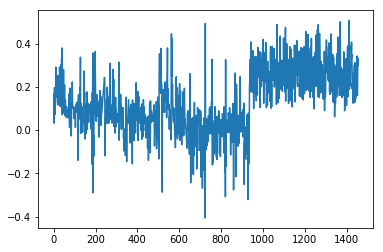

In [13]:
deng_linear_impute['ndvi_ne'].plot()

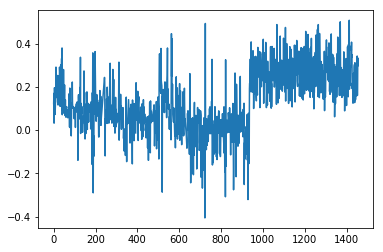

In [14]:
deng_derivatives_impute['ndvi_ne'].plot()

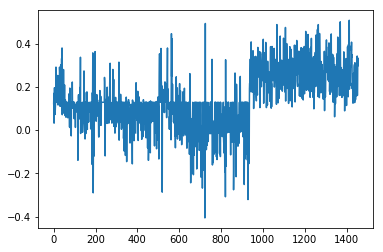

In [15]:
deng_data_imputed['ndvi_ne'].plot()

In [16]:
# Lets's use the linearly imputed data
deng_data_imputed = deng_linear_impute

In [17]:
deng_data_imputed.isnull().sum()/len(deng_data_imputed)*100

city                                     0.0
year                                     0.0
weekofyear                               0.0
week_start_date                          0.0
ndvi_ne                                  0.0
ndvi_nw                                  0.0
ndvi_se                                  0.0
ndvi_sw                                  0.0
precipitation_amt_mm                     0.0
reanalysis_air_temp_k                    0.0
reanalysis_avg_temp_k                    0.0
reanalysis_dew_point_temp_k              0.0
reanalysis_max_air_temp_k                0.0
reanalysis_min_air_temp_k                0.0
reanalysis_precip_amt_kg_per_m2          0.0
reanalysis_relative_humidity_percent     0.0
reanalysis_sat_precip_amt_mm             0.0
reanalysis_specific_humidity_g_per_kg    0.0
reanalysis_tdtr_k                        0.0
station_avg_temp_c                       0.0
station_diur_temp_rng_c                  0.0
station_max_temp_c                       0.0
station_mi

In [18]:
deng_data_imputed.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000
mean,2001.026878,26.412130,0.131656,0.128011,0.203166,0.202092,45.670482,298.699498,299.223156,295.245157,...,82.167472,45.670482,16.745225,4.901398,27.183230,8.098172,32.451137,22.09807,39.366713,24.685734
std,5.406124,14.964361,0.137188,0.119338,0.073723,0.083468,43.693627,1.361537,1.261339,1.527003,...,7.156206,43.693627,1.541798,3.543842,1.281273,2.127792,1.957547,1.57306,47.342320,43.653121
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.70000,0.000000,0.000000
25%,1997.000000,13.000000,0.037475,0.048100,0.153986,0.144600,9.750000,297.657143,298.257143,294.117143,...,77.181429,9.750000,15.553571,2.328571,26.326786,6.528571,31.100000,21.10000,8.700000,5.000000
50%,2002.000000,26.000000,0.115700,0.115967,0.195729,0.190143,38.300000,298.642857,299.285714,295.640000,...,80.300000,38.300000,17.085714,2.857143,27.400000,7.357143,32.800000,22.20000,24.000000,12.000000
75%,2005.000000,39.000000,0.231457,0.213086,0.247536,0.246629,70.190000,299.830000,300.207143,296.458571,...,86.407143,70.190000,17.976429,7.621429,28.133036,9.607143,33.900000,23.30000,53.900000,28.000000
max,2010.000000,52.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.60000,543.300000,461.000000


Now lets calcuate the varience

In [19]:
deng_data_imputed.var()

year                                       29.226174
weekofyear                                223.932101
ndvi_ne                                     0.018821
ndvi_nw                                     0.014241
ndvi_se                                     0.005435
ndvi_sw                                     0.006967
precipitation_amt_mm                     1909.133080
reanalysis_air_temp_k                       1.853782
reanalysis_avg_temp_k                       1.590976
reanalysis_dew_point_temp_k                 2.331737
reanalysis_max_air_temp_k                  10.453217
reanalysis_min_air_temp_k                   6.563916
reanalysis_precip_amt_kg_per_m2          1881.953599
reanalysis_relative_humidity_percent       51.211284
reanalysis_sat_precip_amt_mm             1909.133080
reanalysis_specific_humidity_g_per_kg       2.377142
reanalysis_tdtr_k                          12.558813
station_avg_temp_c                          1.641660
station_diur_temp_rng_c                     4.

## Removing low varience features

The following code removes features with varience less then 10

In [20]:
deng_imputed_varience = deng_data_imputed.copy()

In [21]:
deng_imputed_varience.describe()

for feature in features:
    if deng_imputed_varience[feature].var() <=10:   #setting the threshold as 10%
        deng_imputed_varience.drop([feature], axis=1,inplace=True)

In [22]:
deng_imputed_varience.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'precipitation_amt_mm',
       'reanalysis_max_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_tdtr_k', 'station_precip_mm', 'total_cases'],
      dtype='object')

## High Correlation filter

High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).

As a general guideline, we should keep those variables which show a decent or high correlation with the target variable.

Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should consider dropping one of those variables.

In [23]:
# We'll drop the dependant variable before we look at the independant features
df = deng_imputed_varience.drop('total_cases', 1)
df.corr()

,year,weekofyear,precipitation_amt_mm,reanalysis_max_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_tdtr_k,station_precip_mm
year,1.000000,-0.073741,0.206217,0.480913,0.133617,0.336989,0.206217,0.491109,0.218557
weekofyear,-0.073741,1.000000,0.119476,0.238879,0.072556,-0.016393,0.119476,0.078596,0.064448
precipitation_amt_mm,0.206217,0.119476,1.000000,0.283938,0.481338,0.499742,1.000000,0.202554,0.485061
reanalysis_max_air_temp_k,0.480913,0.238879,0.283938,1.000000,0.193214,0.400490,0.283938,0.918658,0.247492
reanalysis_precip_amt_kg_per_m2,0.133617,0.072556,0.481338,0.193214,1.000000,0.594296,0.481338,0.095093,0.347753
reanalysis_relative_humidity_percent,0.336989,-0.016393,0.499742,0.400490,0.594296,1.000000,0.499742,0.360622,0.448893
reanalysis_sat_precip_amt_mm,0.206217,0.119476,1.000000,0.283938,0.481338,0.499742,1.000000,0.202554,0.485061
reanalysis_tdtr_k,0.491109,0.078596,0.202554,0.918658,0.095093,0.360622,0.202554,1.000000,0.227986
station_precip_mm,0.218557,0.064448,0.485061,0.247492,0.347753,0.448893,0.485061,0.227986,1.000000


From the above table we can see that some values are correlates. We'll remove values which are correlated (possitivly or negativly) 0.8 and above.

"reanalysis_sat_precip_amt_mm" and "percipitatioin_amt_mm" with a correlation value of 1.00

"reanalysis_tdtr_k" and "reanalysis_max_air_temp_k"        with a correlation value of 0.92


We will remove... "reanalysis_sat_precip_amt_mm" and "reanalysis_tdtr_k" this time around (no real reason as to which was choosenover the other)

In [24]:
# Remove correlated values
deng_imputed_varience_final = deng_imputed_varience.copy()
deng_imputed_varience_final.drop(["reanalysis_sat_precip_amt_mm", "reanalysis_tdtr_k"], axis=1,inplace=True)
deng_imputed_varience_final.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'precipitation_amt_mm',
       'reanalysis_max_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'station_precip_mm',
       'total_cases'],
      dtype='object')

## One-Hot Encoding

Now we need to code our categorical features to numeric values (city and week_start_date)

We will one-hot encode city and convert week_start_date into a numeric format

In [25]:
one_hot = deng_imputed_varience.copy()

# Convert city data type to categorical
one_hot['city'] = pd.Categorical(one_hot['city'])

# Generate dummy/indicator variables (coding scheme) for categories in 'city'
dfDummies = pd.get_dummies(one_hot['city'], prefix = 'category')

# Concatinate codes (dfDummies) to original df and remove the 'city' column
one_hot = pd.concat([one_hot, dfDummies], axis = 1)
one_hot.drop(["city"], axis=1,inplace=True)

one_hot

,year,weekofyear,week_start_date,precipitation_amt_mm,reanalysis_max_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_tdtr_k,station_precip_mm,total_cases,category_iq,category_sj
0,1990,18,1990-04-30,12.42,299.8,32.00,73.365714,12.42,2.628571,16.0,4,0,1
1,1990,19,1990-05-07,22.82,300.9,17.94,77.368571,22.82,2.371429,8.6,5,0,1
2,1990,20,1990-05-14,34.54,300.5,26.10,82.052857,34.54,2.300000,41.4,4,0,1
3,1990,21,1990-05-21,15.36,301.4,13.90,80.337143,15.36,2.428571,4.0,3,0,1
4,1990,22,1990-05-28,7.52,301.9,12.20,80.460000,7.52,3.014286,5.8,6,0,1
5,1990,23,1990-06-04,9.58,302.4,26.49,79.891429,9.58,2.100000,39.1,2,0,1
6,1990,24,1990-06-11,3.48,301.3,38.60,82.000000,3.48,2.042857,29.7,4,0,1
7,1990,25,1990-06-18,151.12,300.6,30.00,83.375714,151.12,1.571429,21.1,5,0,1
8,1990,26,1990-06-25,19.32,302.1,37.51,82.768571,19.32,1.885714,21.1,10,0,1
9,1990,27,1990-07-02,14.41,302.3,28.40,81.281429,14.41,2.014286,1.1,6,0,1


Now we'll extract the month and day from week_start_date feature and save them under a new month and week_start_day column. Then remove week_start_date.

In [26]:
numeric_data = one_hot.copy()
numeric_data["week_start_date"]

0       1990-04-30
1       1990-05-07
2       1990-05-14
3       1990-05-21
4       1990-05-28
5       1990-06-04
6       1990-06-11
7       1990-06-18
8       1990-06-25
9       1990-07-02
10      1990-07-09
11      1990-07-16
12      1990-07-23
13      1990-07-30
14      1990-08-06
15      1990-08-13
16      1990-08-20
17      1990-08-27
18      1990-09-03
19      1990-09-10
20      1990-09-17
21      1990-09-24
22      1990-10-01
23      1990-10-08
24      1990-10-15
25      1990-10-22
26      1990-10-29
27      1990-11-05
28      1990-11-12
29      1990-11-19
           ...    
1425    2009-11-26
1426    2009-12-03
1427    2009-12-10
1428    2009-12-17
1429    2009-12-24
1431    2010-01-08
1432    2010-01-15
1433    2010-01-22
1434    2010-01-29
1435    2010-02-05
1436    2010-02-12
1437    2010-02-19
1438    2010-02-26
1439    2010-03-05
1440    2010-03-12
1441    2010-03-19
1442    2010-03-26
1443    2010-04-02
1444    2010-04-09
1445    2010-04-16
1446    2010-04-23
1447    2010

In [27]:
# Functions to get corresponding interger values of a date in format year-month-day
def extractYear(week_start_date):
    # Week start date is in the format "2010-02-26"
    return int(week_start_date.split('-')[0])
def extractMonth(week_start_date):
    # Week start date is in the format "2010-02-26"
    return int(week_start_date.split('-')[1])
def extractDay(week_start_date):
    # Week start date is in the format "2010-02-26"
    return int(week_start_date.split('-')[2])

# Applying function to week_start_date
numeric_data["month"] = numeric_data.apply(lambda row: extractMonth(row["week_start_date"]), axis = 1)
numeric_data["week_start_day"] = numeric_data.apply(lambda row: extractDay(row["week_start_date"]), axis = 1)

# Removing week_start_date column
numeric_data.drop(["week_start_date"], axis=1,inplace=True)

In [28]:
numeric_data.describe()

,year,weekofyear,precipitation_amt_mm,reanalysis_max_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_tdtr_k,station_precip_mm,total_cases,category_iq,category_sj,month,week_start_day
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,2001.026878,26.412130,45.670482,303.422743,40.151733,82.167472,45.670482,4.901398,39.366713,24.685734,0.356995,0.643005,6.436940,15.339076
std,5.406124,14.964361,43.693627,3.233143,43.381489,7.156206,43.693627,3.543842,47.342320,43.653121,0.479279,0.479279,3.443032,8.732625
min,1990.000000,1.000000,0.000000,297.800000,0.000000,57.787143,0.000000,1.357143,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1997.000000,13.000000,9.750000,301.000000,13.150000,77.181429,9.750000,2.328571,8.700000,5.000000,0.000000,0.000000,4.000000,8.000000
50%,2002.000000,26.000000,38.300000,302.400000,27.290000,80.300000,38.300000,2.857143,24.000000,12.000000,0.000000,1.000000,7.000000,15.000000
75%,2005.000000,39.000000,70.190000,305.500000,52.350000,86.407143,70.190000,7.621429,53.900000,28.000000,1.000000,1.000000,9.000000,23.000000
max,2010.000000,52.000000,390.600000,314.000000,570.500000,98.610000,390.600000,16.028571,543.300000,461.000000,1.000000,1.000000,12.000000,30.000000


# Normalizing the Data

In [29]:
cleaned_data = numeric_data.copy()
cleaned_data_normalized = cleaned_data.copy()

In [30]:
# Function for normalizing a column
def normalize_col(data):
    data -= np.min(data)
    # "peak-to-peak" (max subtract the min values )
    data /= np.ptp(data)
    return data

# Function for normalizing a data set
def normalize(data, features = []):
    data = data.copy()
    if len(features) == 0:
        features = data.columns
    
    for feature in features:
        data[feature] = normalize_col(data[feature])
        
    return data

In [31]:
cleaned_data_normalized = normalize(cleaned_data_normalized)

In [32]:
cleaned_data_normalized.describe()

,year,weekofyear,precipitation_amt_mm,reanalysis_max_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_tdtr_k,station_precip_mm,total_cases,category_iq,category_sj,month,week_start_day
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,0.551344,0.498277,0.116924,0.347083,0.070380,0.597223,0.116924,0.241575,0.072459,0.053548,0.356995,0.643005,0.494267,0.494451
std,0.270306,0.293419,0.111863,0.199577,0.076041,0.175299,0.111863,0.241547,0.087138,0.094692,0.479279,0.479279,0.313003,0.301125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350000,0.235294,0.024962,0.197531,0.023050,0.475084,0.024962,0.066212,0.016013,0.010846,0.000000,0.000000,0.272727,0.241379
50%,0.600000,0.490196,0.098054,0.283951,0.047835,0.551477,0.098054,0.102240,0.044174,0.026030,0.000000,1.000000,0.545455,0.482759
75%,0.750000,0.745098,0.179698,0.475309,0.091762,0.701078,0.179698,0.426972,0.099209,0.060738,1.000000,1.000000,0.727273,0.758621
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Different cleaned features

In [33]:
# no non-numeric values, imputed(linear interpolated), one_hot encoding
deng_numeric = deng_data.copy()
deng_numeric = deng_numeric[deng_numeric.weekofyear <= 52]

deng_numeric = deng_numeric.interpolate()
    
deng_numeric = pd.concat([deng_numeric, dfDummies], axis = 1)
deng_numeric.drop(["city"], axis=1,inplace=True)

deng_numeric["month"] = deng_numeric.apply(lambda row: extractMonth(row["week_start_date"]), axis = 1)
deng_numeric["week_start_day"] = deng_numeric.apply(lambda row: extractDay(row["week_start_date"]), axis = 1)
deng_numeric.drop(["week_start_date"], axis=1,inplace=True)

deng_numeric["week_number"] = deng_numeric["weekofyear"] + (52*(deng_numeric["year"] - 1990))
csv_save(deng_numeric, "deng_numeric")

# Varience filter

deng_varienceFilter = deng_numeric.copy()
for feature in deng_varienceFilter.columns:
    if "category" not in feature:
        if deng_varienceFilter[feature].var() <=10:   #setting the threshold as 10%
            deng_varienceFilter.drop([feature], axis=1,inplace=True)


# Correlation filter
deng_selectFeatures = deng_varienceFilter.copy()
deng_selectFeatures.drop(["reanalysis_sat_precip_amt_mm", "reanalysis_tdtr_k"], axis=1,inplace=True)
csv_save(deng_selectFeatures, "deng_selectFeatures")

# Normalized
deng_numeric_normalized = deng_numeric.copy()
deng_selectFeatures_normalized = deng_selectFeatures.copy()

csv_save(normalize(deng_numeric_normalized), "deng_numeric_normalized")
csv_save(normalize(deng_selectFeatures_normalized), "deng_selectFeatures_normalized")


In [34]:
deng_numeric.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'category_iq',
       'category_sj', 'month', 'week_start_day', 'week_number'],
      dtype='object')

# Training a model

The followed tutorial can be found at: https://www.tensorflow.org/tutorials/keras/basic_regression

In [35]:
# Use seaborn for pairplot
!pip install -q seaborn

You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.11.0


In [37]:
dataset = deng_numeric.copy()[['year', 'weekofyear', 'total_cases', 'precipitation_amt_mm',
       'ndvi_ne','reanalysis_min_air_temp_k']]

### Split data

Split the data into train and test
Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.

In [46]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#Alternate split
train_dataset = dataset[250:]
test_dataset = dataset.drop(train_dataset.index)

### Inspect the data
Have a quick look at the joint distribution of a few pairs of columns from the training set.

In [47]:
train_dataset.columns

Index(['year', 'weekofyear', 'total_cases', 'precipitation_amt_mm', 'ndvi_ne',
       'reanalysis_min_air_temp_k'],
      dtype='object')

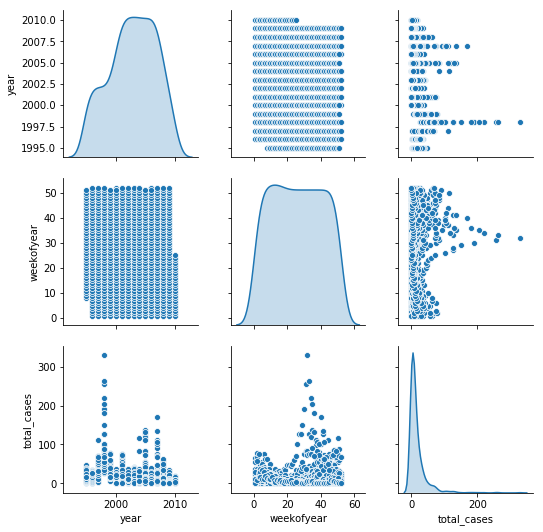

In [48]:
sns.pairplot(train_dataset[['year', 'weekofyear', 'total_cases']], diag_kind="kde")

Also look at the overall statistics:

In [49]:
train_stats = train_dataset.describe()
train_stats.pop('total_cases')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
year,1201.0,2002.858451,3.924701,1995.00000,2000.0000,2003.000000,2006.0000,2010.000000
weekofyear,1201.0,26.277269,14.947984,1.00000,13.0000,26.000000,39.0000,52.000000
precipitation_amt_mm,1201.0,48.731628,44.648024,0.00000,12.2200,41.920000,73.1100,390.600000
ndvi_ne,1201.0,0.135915,0.145422,-0.40625,0.0308,0.124483,0.2485,0.508357
reanalysis_min_air_temp_k,1201.0,295.434888,2.678800,286.90000,293.4000,295.800000,297.8000,299.900000






### Split features from labels
Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [50]:
train_labels = train_dataset.pop('total_cases')
test_labels = test_dataset.pop('total_cases')

### Normalize the data
Look again at the train_stats block above and note how different the ranges of each feature are.

It is good practice to normalize features that use different scales and ranges. Although the model might converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [51]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

## The model
### Build the model
Let's build our model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [52]:
def build_model():
  model = keras.Sequential([
    layers.Dense(5, activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(0.001),
                 input_shape=[len(train_dataset.keys())]),
    layers.Dense(15, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(5, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [53]:
model = build_model()

### Inspect the model
Use the .summary method to print a simple description of the model

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 206
Trainable params: 206
Non-trainable params: 0
_________________________________________________________________


Now try out the model. Take a batch of 10 examples from the training data and call model.predict on it.

In [55]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.18464527],
       [0.17990117],
       [0.21759409],
       [0.26158485],
       [0.19212402],
       [0.24459462],
       [0.20445754],
       [0.14647047],
       [0.14839694],
       [0.15242064]], dtype=float32)

It seems to be working, and it produces a result of the expected shape and type.

### Train the model
Train the model for 1000 epochs, and record the training and validation accuracy in the history object.

In [62]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 10000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................................................

Visualize the model's training progress using the stats stored in the history object.

In [63]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
9995,476.347020,16.296876,476.179051,175.189610,8.184569,175.021644,9995
9996,462.063560,16.309638,461.895591,177.035816,8.284399,176.867830,9996
9997,432.148126,15.553675,431.980116,176.435336,8.274020,176.267369,9997
9998,473.583032,16.347934,473.415040,174.849869,8.230742,174.681868,9998
9999,461.545983,16.042312,461.377995,173.448952,8.184203,173.280947,9999


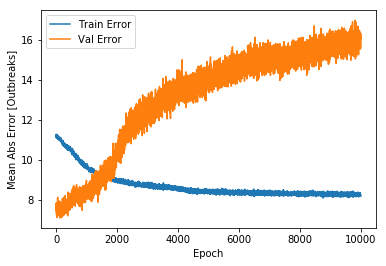

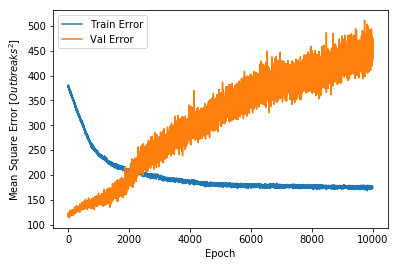

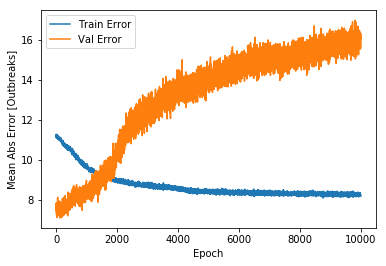

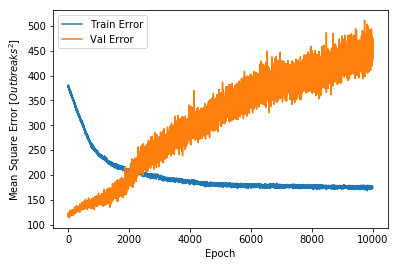

In [64]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Outbreaks]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  #plt.ylim([0,5])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Outbreaks^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  #plt.ylim([0,20])

plot_history(history)
plot_history(history)

### Make predictions
Finally, predict MPG values using data in the testing set:

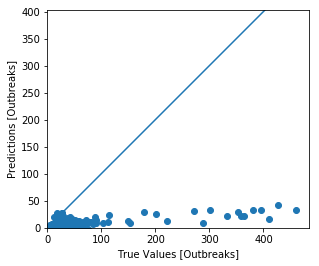

In [65]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Outbreaks]')
plt.ylabel('Predictions [Outbreaks]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 600], [-100, 600])

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
mean_squared_error(test_labels, test_predictions)

9388.406489374192

saving this model

In [ ]:
filepath = os.getcwd()
filepath = os.path.join(filepath, "tfData\\model3")

print(filepath)

tf.keras.models.save_model(
    model,
    filepath,
    overwrite=False,
    include_optimizer=True
)

## Testing the Model on the Competition Test Data

In [ ]:
compitition_test = competition_test_features.copy()[['year', 'weekofyear']]

In [ ]:
# Normalize the data before feeding it into model (since model was trained on normalized data)
norm_comp_test = norm(compitition_test) 

In [ ]:
# Pedicted data
competition_prediction = model.predict(norm_comp_test)

In [ ]:
# Prepare the submission format
submission_data = competition_test_features.copy()[['city','year', 'weekofyear']]
submission_data['total_cases'] = competition_prediction
submission_data['total_cases'] = submission_data['total_cases'].apply(lambda x: max(x,0))

In [ ]:
submission_data.describe()

In [ ]:
# Save the submission data
csv_save(submission_data, "submission_data3")

# Training a Classifier Model to Predict When an outbreak Occurs

First we will create a new column called outbreak which will contain only 1's and 0's. 1 will indicate there was > 0 outbreaks that occured, while 0 will indicate that there was <= 0 outbreaks.

In [ ]:
def binairy(val,thresh):
    if val < thresh: return 0
    return 1

In [ ]:
outbreak_data = deng_numeric.copy()
outbreak_data['outbreak'] = outbreak_data['total_cases'].apply(lambda x: binairy(x,1))

In [ ]:
# Split the data
train_dataset = outbreak_data.sample(frac=0.8,random_state=0)
test_dataset = outbreak_data.drop(train_dataset.index)

In [ ]:
# Slplit test data lables and normalize
train_labels = train_dataset.pop('outbreak')
test_labels = test_dataset.pop('outbreak')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
def build_classifierModel():
  model = keras.Sequential([
    layers.Dense(5, activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(0.001),
                 input_shape=[len(train_dataset.keys())]),
    layers.Dense(15, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(5, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model2 = build_classifierModel()

In [ ]:
history = model2.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Outbreaks]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  #plt.ylim([0,5])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Outbreaks^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  #plt.ylim([0,20])

plot_history(history)
plot_history(history)